In [1]:
#   imports

from calculation import labelx_from_dict_fn, xy_from_dict_fn
from initialize import Experiment
from metrics import Bins
from figures import Histogram, HistogramAnimated, HistogramMultiple, PlotLine

In [2]:
#   global variable declaration

colors = ['sienna', 'tomato', 'orange', 'darkgoldenrod', 'limegreen', 
          'yellowgreen', 'teal', 'deepskyblue', 'royalblue', 'slateblue', 
          'darkviolet', 'orchid', 'hotpink']
experiment_number = 20230404
ref_t = 400


In [3]:
#   initialize

experiment = Experiment(20230404, colors)
experiment_gfp_bins = Bins(experiment.gfp_pop_dict)
well_gfp_bins = Bins(experiment.all_well_gfp_pop_dict)


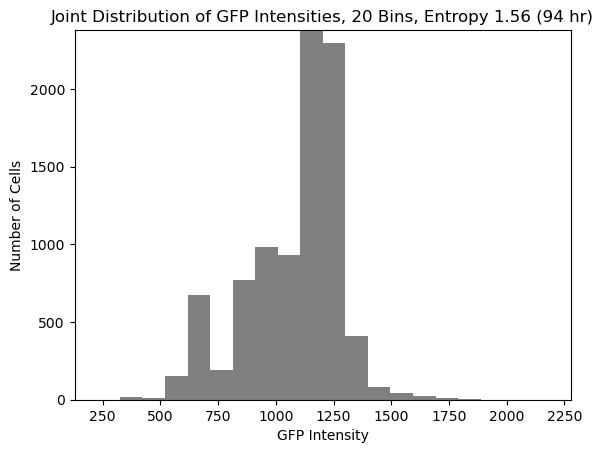

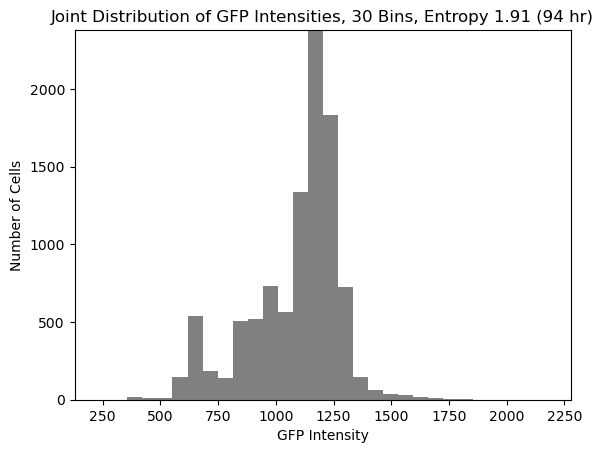

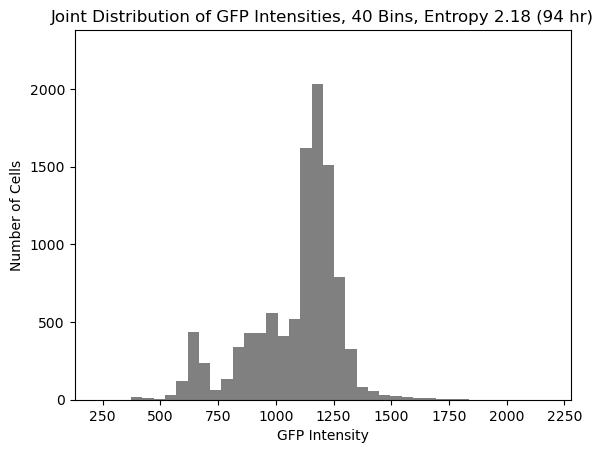

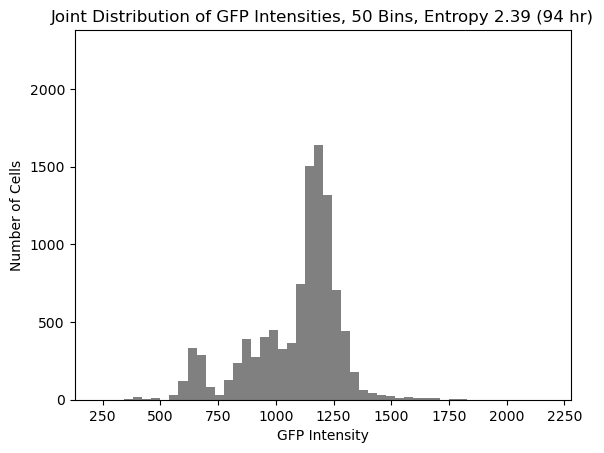

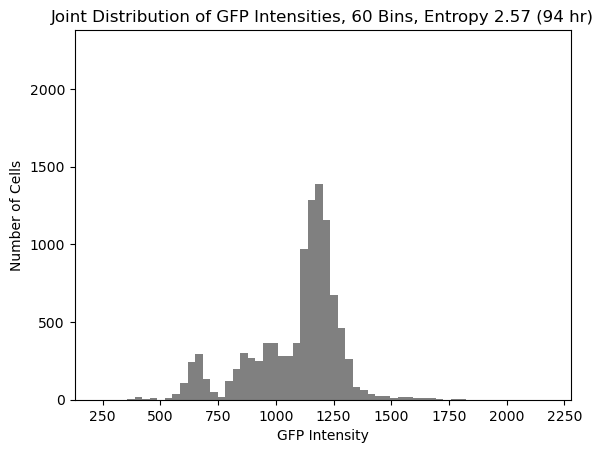

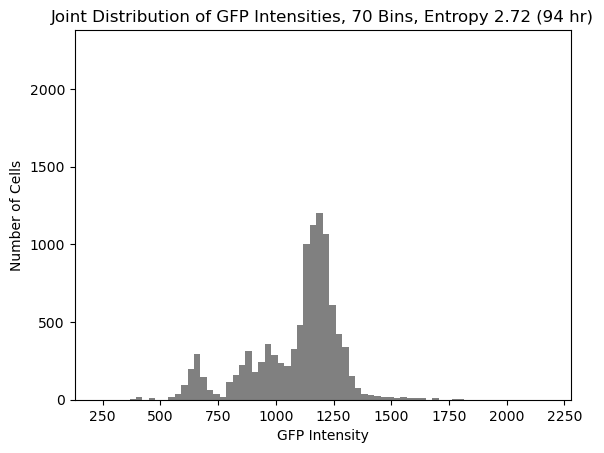

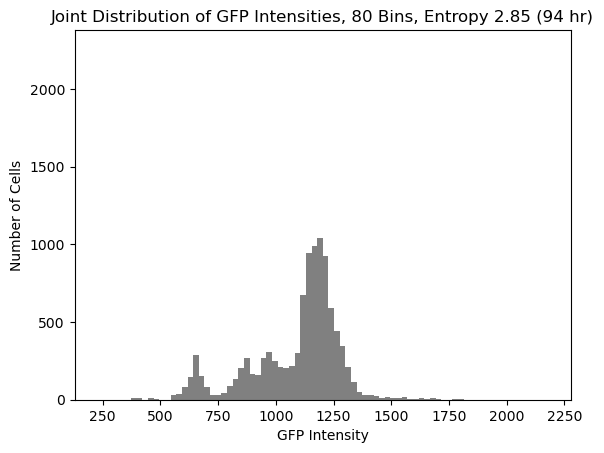

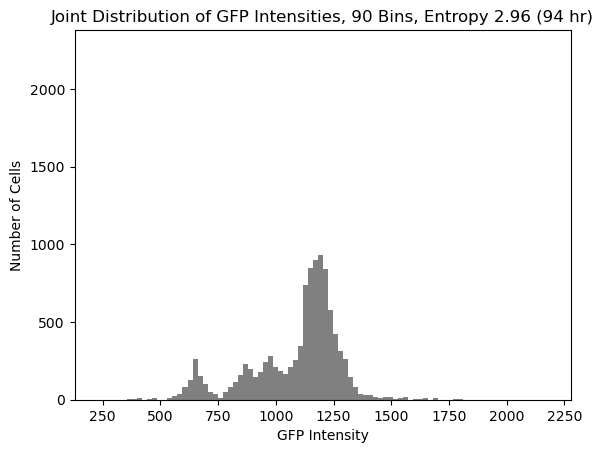

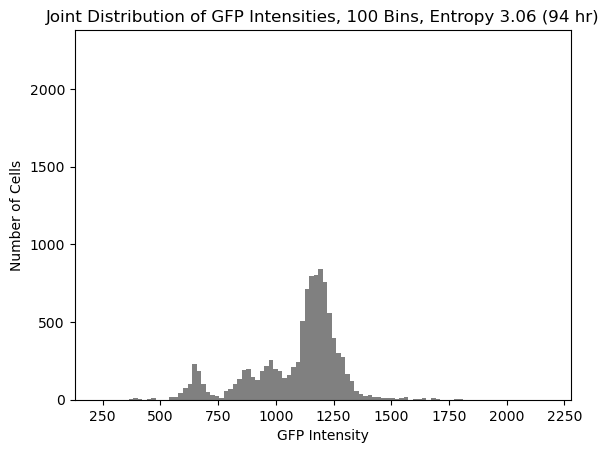

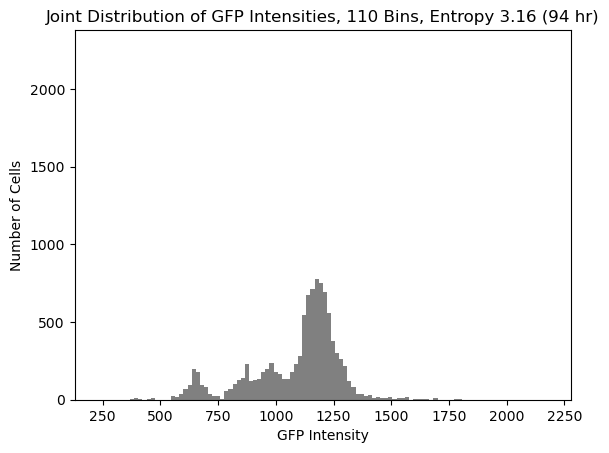

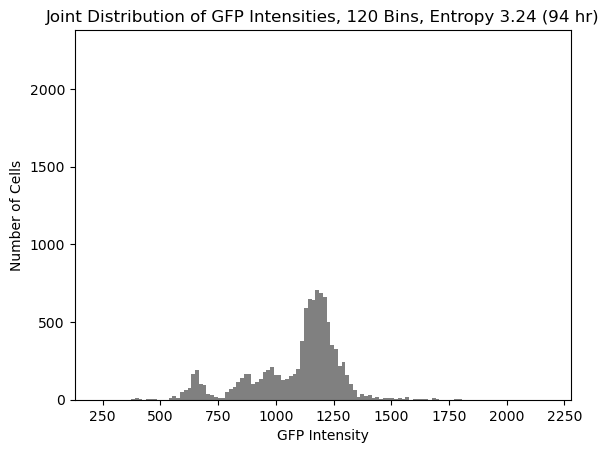

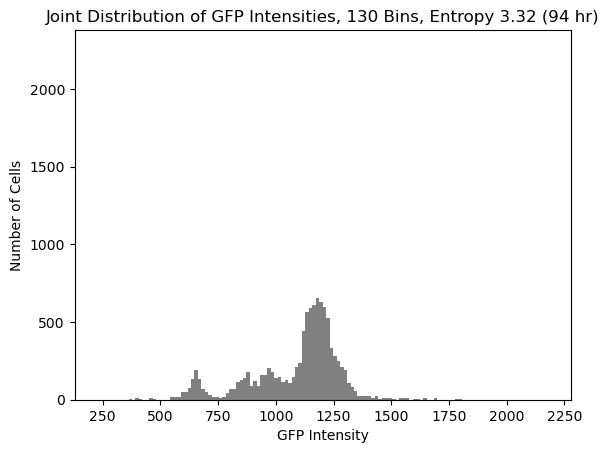

In [4]:
#   plot experiment histogram for each number of bins

for n in experiment_gfp_bins.n_list:
    hist = Histogram(experiment.gfp_pop_dict[ref_t], 
                     experiment_gfp_bins.bin_edges_dict[n], 
                     ylim=experiment_gfp_bins.ylim, 
                     title='Joint Distribution of GFP Intensities, '\
                     f'{n} Bins, Entropy '\
                     f'{round(experiment_gfp_bins.entropy_dict[n], 2)} '\
                     f'({round(experiment.elapsed_dict[ref_t])} hr)',  
                     xlabel='GFP Intensity', ylabel='Number of Cells', 
                     save=f'bin_selection_figures/experiment_{n}.png')
    hist.show()
    

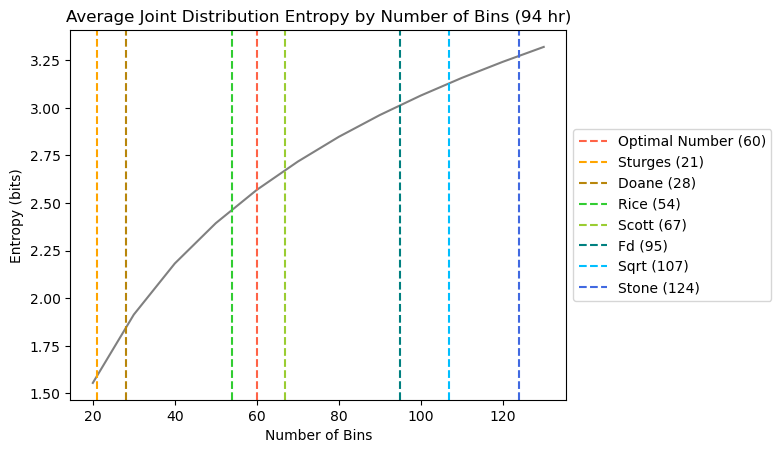

In [5]:
#   plot entropy as a function of number of bins

x, y = xy_from_dict_fn(experiment_gfp_bins.entropy_dict)
axv_labels, axv_xs = labelx_from_dict_fn(experiment_gfp_bins.method_bin_dict)
axv_labels = ([f'Optimal Number ({experiment_gfp_bins.n_bins})'] + 
              [f'{l.capitalize()} ({n})' for l, n in zip(axv_labels, axv_xs)])
axv_xs = [experiment_gfp_bins.n_bins] + axv_xs
axv_colors = experiment.colors[1:len(axv_labels)+1]
experiment_bin_selection = PlotLine(x, y, axv_x_list=axv_xs, 
                                    axv_label_list=axv_labels, 
                                    axv_color_list=axv_colors, 
                                    title='Average Joint Distribution Entropy '\
                                    'by Number of Bins '\
                                    f'({round(experiment.elapsed_dict[ref_t])}'\
                                    ' hr)', 
                                    xlabel='Number of Bins', 
                                    ylabel='Entropy (bits)', save=
                                    'bin_selection_figures/'\
                                    'experiment_entropy.png')
experiment_bin_selection.show()


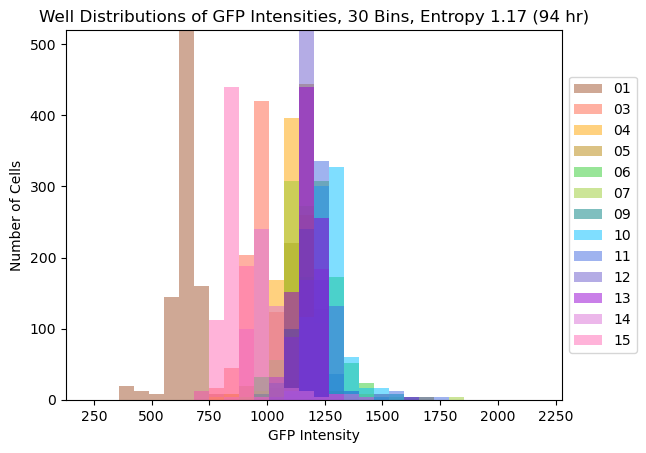

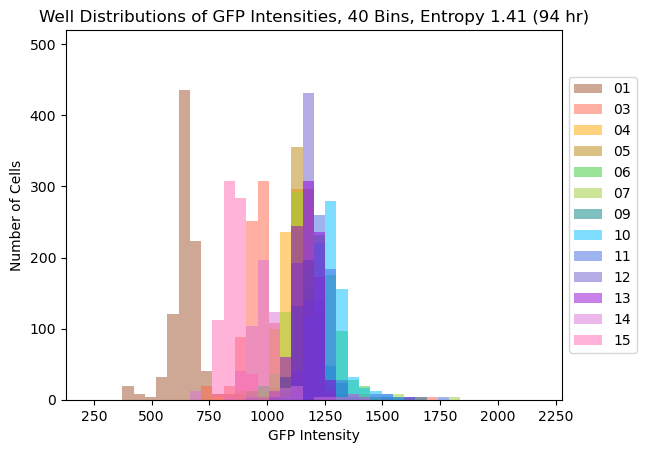

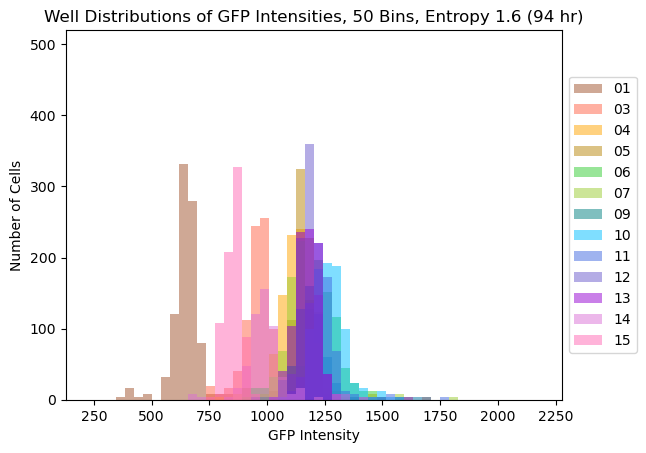

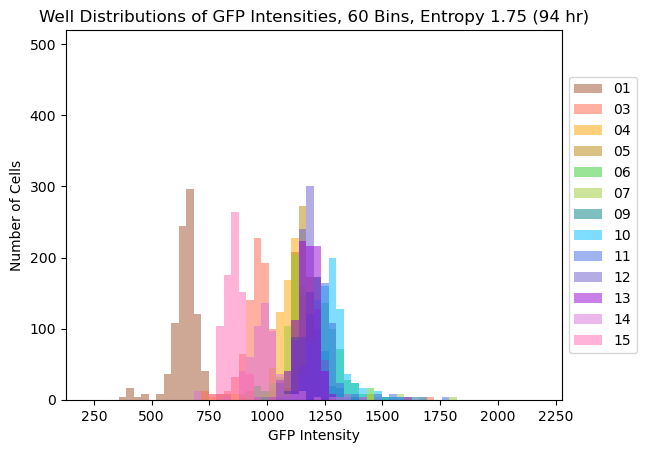

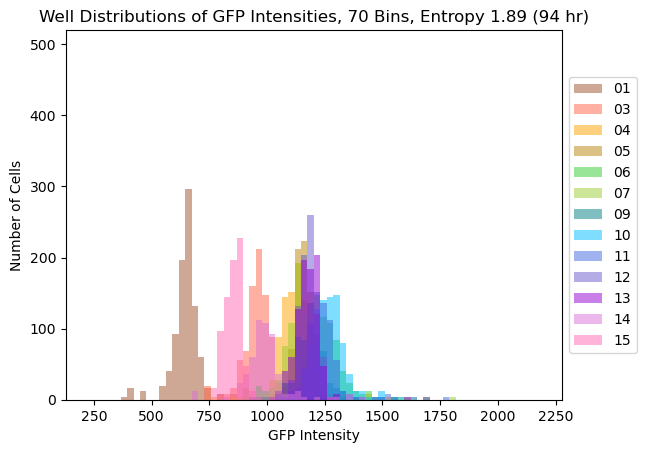

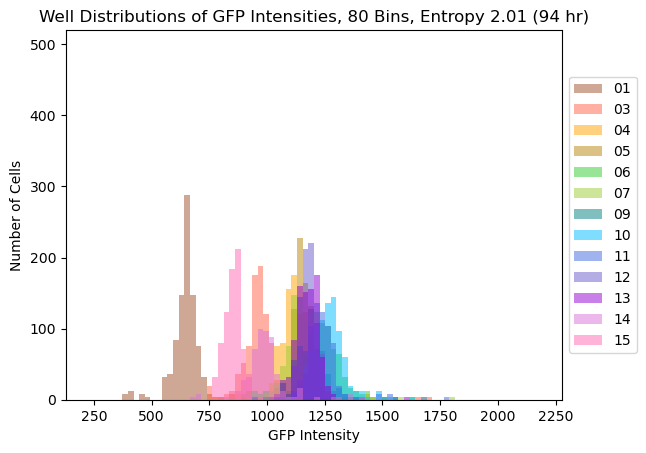

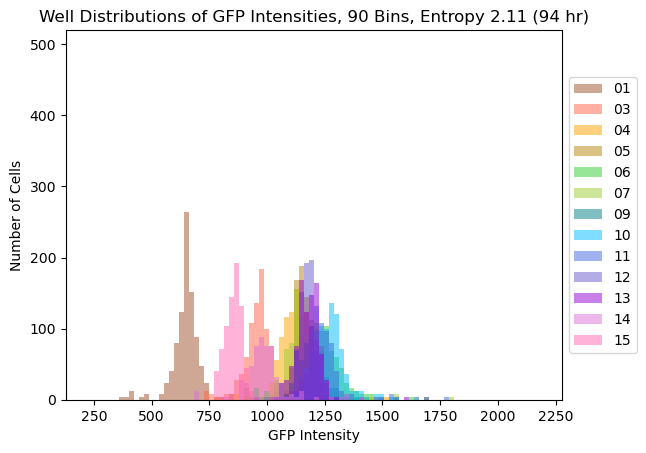

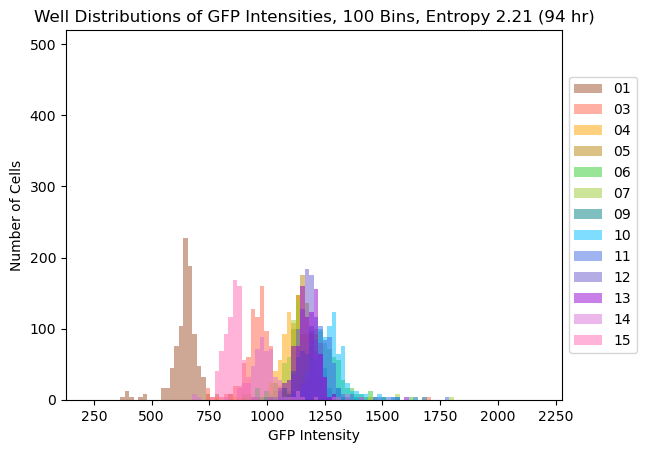

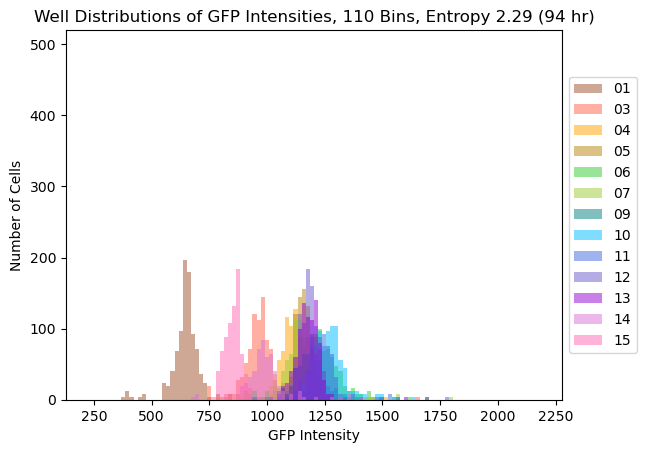

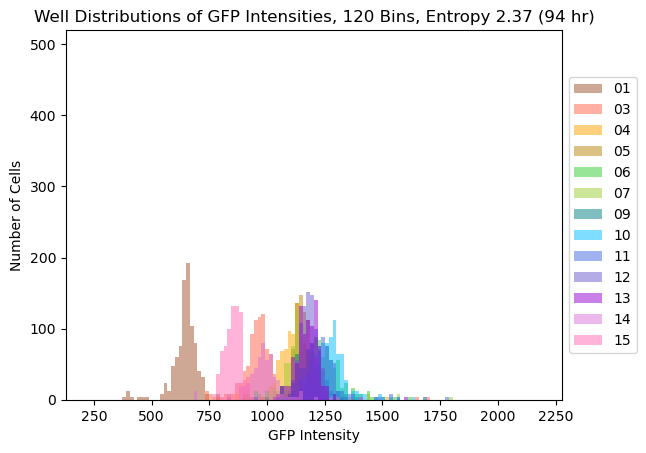

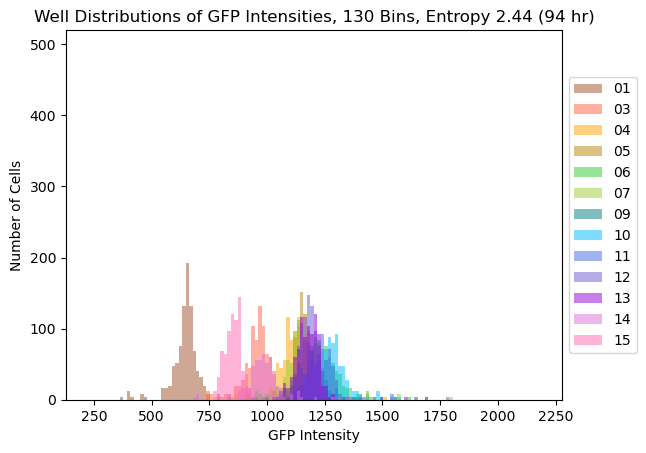

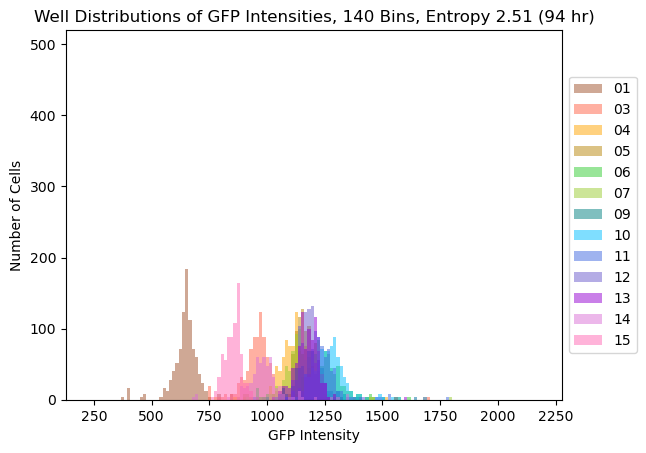

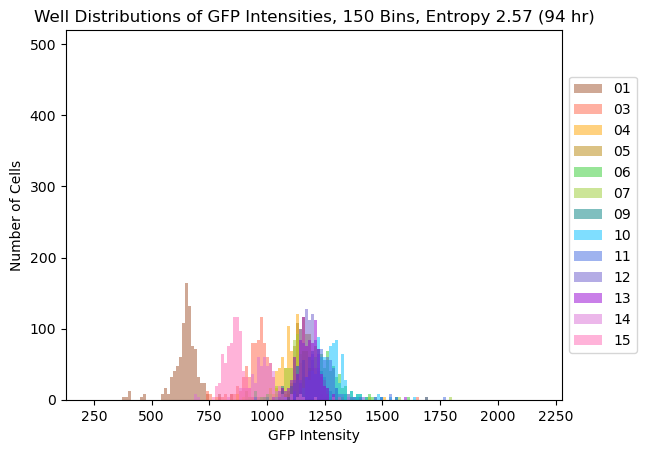

In [6]:
#   plot experiment histogram for each number of bins

pop_list = [experiment.well_dict[well_id].gfp_pop_dict[ref_t] 
            for well_id in experiment.well_id_list]

for n in well_gfp_bins.n_list:
    hist = HistogramMultiple(pop_list, well_gfp_bins.bin_edges_dict[n], 
                             ylim=well_gfp_bins.ylim, 
                             label_list=experiment.well_id_list, 
                             color_list=experiment.colors, 
                             title='Well Distributions of GFP Intensities, '\
                             f'{n} Bins, Entropy ' \
                             f'{round(well_gfp_bins.entropy_dict[n], 2)} ('\
                             f'{round(experiment.elapsed_dict[ref_t])} hr)',
                             xlabel='GFP Intensity', ylabel='Number of Cells', 
                             save=f'bin_selection_figures/wells_{n}.png')
    hist.show()


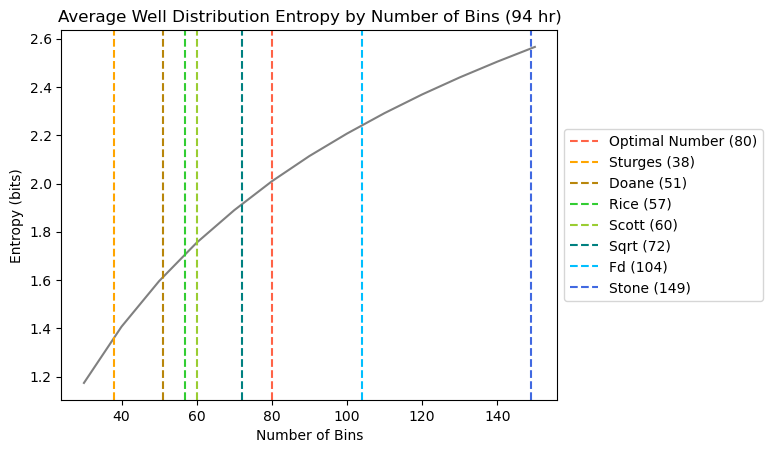

In [7]:
#   plot entropy as a function of number of bins

x, y = xy_from_dict_fn(well_gfp_bins.entropy_dict)
axv_labels, axv_xs = labelx_from_dict_fn(well_gfp_bins.method_bin_dict)
axv_labels = ([f'Optimal Number ({well_gfp_bins.n_bins})'] + 
              [f'{l.capitalize()} ({n})' for l, n in zip(axv_labels, axv_xs)])
axv_xs = [well_gfp_bins.n_bins] + axv_xs
axv_colors = experiment.colors[1:len(axv_labels)+1]
experiment_bin_selection = PlotLine(x, y, axv_x_list=axv_xs, 
                                    axv_label_list=axv_labels, 
                                    axv_color_list=axv_colors, 
                                    title='Average Well Distribution Entropy '\
                                    'by Number of Bins ('\
                                    f'{round(experiment.elapsed_dict[ref_t])}'\
                                    ' hr)', 
                                    xlabel='Number of Bins', 
                                    ylabel='Entropy (bits)', save=
                                    f'bin_selection_figures/wells_entropy.png')
experiment_bin_selection.show()


In [4]:
#   make necessary notebook adjustments for embedding video

%matplotlib notebook
import matplotlib.pyplot as plt
plt.ioff()


In [9]:
#   plot animated experiment distribution through time 

experiment_anihist = HistogramAnimated(experiment.gfp_pop_dict, 
                                       experiment.elapsed_dict, 
                                       experiment_gfp_bins.bin_edges, 
                                       ylim=experiment_gfp_bins.ylim, 
                                       xlabel='GFP Intensity', 
                                       ylabel='Number of Cells', title=
                                       'Joint Distribution of GFP Intensities',
                                       save='bin_selection_figures/experiment_'\
                                       'animated.mp4')
experiment_anihist.show()


In [5]:
#   plot animated distribution of each well through time 

for well_id in experiment.well_id_list:
    well = experiment.well_dict[well_id]
    well_anihist = HistogramAnimated(well.gfp_pop_dict, experiment.elapsed_dict, 
                                     well_gfp_bins.bin_edges, 
                                     ylim=well_gfp_bins.ylim, color=well.color,
                                     xlabel='GFP Intensity', 
                                     ylabel='Number of Cells', title=
                                     'Distribution of GFP Intensities, Well '\
                                     f'{well_id}', 
                                     save=f'bin_selection_figures/well_'\
                                     f'{well_id}_animated.mp4')

    well_anihist.show()